<a href="https://colab.research.google.com/github/tasmimjoti/Machine-Learning-in-Business/blob/main/Financial_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytorch-tabnet
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, fbeta_score, matthews_corrcoef, log_loss
import torch
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Financial Risk Predicition/Financial_risk_assessment.csv")

In [ ]:
df.shape

(20000, 36)

In [ ]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
print("Data Description:")
print(df.describe())
print("\nData Info:")
print(df.info())

Data Description:
                Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609

In [ ]:
df = df.drop(columns=['ApplicationDate', 'RiskScore'])

In [ ]:
df = df.rename(columns={'LoanApproved': 'FinancialRisk'})

In [ ]:
df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,FinancialRisk
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


In [ ]:
df.isnull().sum()

,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0
NumberOfDependents,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.nunique(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              20000 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [ ]:
columns_to_encode = ['EmploymentStatus', 'HomeOwnershipStatus', 'EducationLevel', 'MaritalStatus', 'LoanPurpose']

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode each specified column in place
for column in columns_to_encode:
    if column in df.columns:  # Ensure the column exists
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head(50)

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,FinancialRisk
0,45,39948,617,0,4,22,13152,48,1,2,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,38,39709,628,0,0,15,26045,48,2,1,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,47,40724,570,0,1,26,17627,36,1,2,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,58,69084,545,0,3,34,37898,96,2,1,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,37,103264,594,0,0,17,9184,36,1,1,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1
5,37,178310,626,1,4,16,15433,72,1,0,...,40843,14859.166667,0.756079,5,27071,0.217433,0.217601,385.577074,0.075211,1
6,58,51250,564,0,3,39,12741,48,1,0,...,43894,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0
7,49,97345,516,0,3,23,19634,12,0,5,...,11556,8112.083333,0.933492,5,38621,0.226634,0.209113,1827.360055,0.260767,1
8,34,116841,603,0,1,12,55353,60,0,5,...,49940,9736.750000,0.728397,3,7711,0.258853,0.291539,1762.199026,0.246509,0
9,46,40615,612,0,0,19,25443,12,1,4,...,12852,3384.583333,0.615323,3,116812,0.184443,0.197271,2353.577424,0.903384,0


In [ ]:
df.shape

(20000, 34)

In [ ]:
X = df.drop(columns=['FinancialRisk'])
y = df['FinancialRisk']
X = pd.get_dummies(X, drop_first=True)

<ipython-input-17-38f73b922584>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


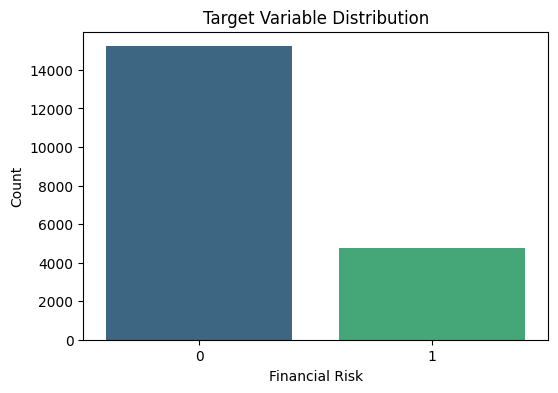

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title("Target Variable Distribution")
plt.xlabel("Financial Risk")
plt.ylabel("Count")
plt.show()

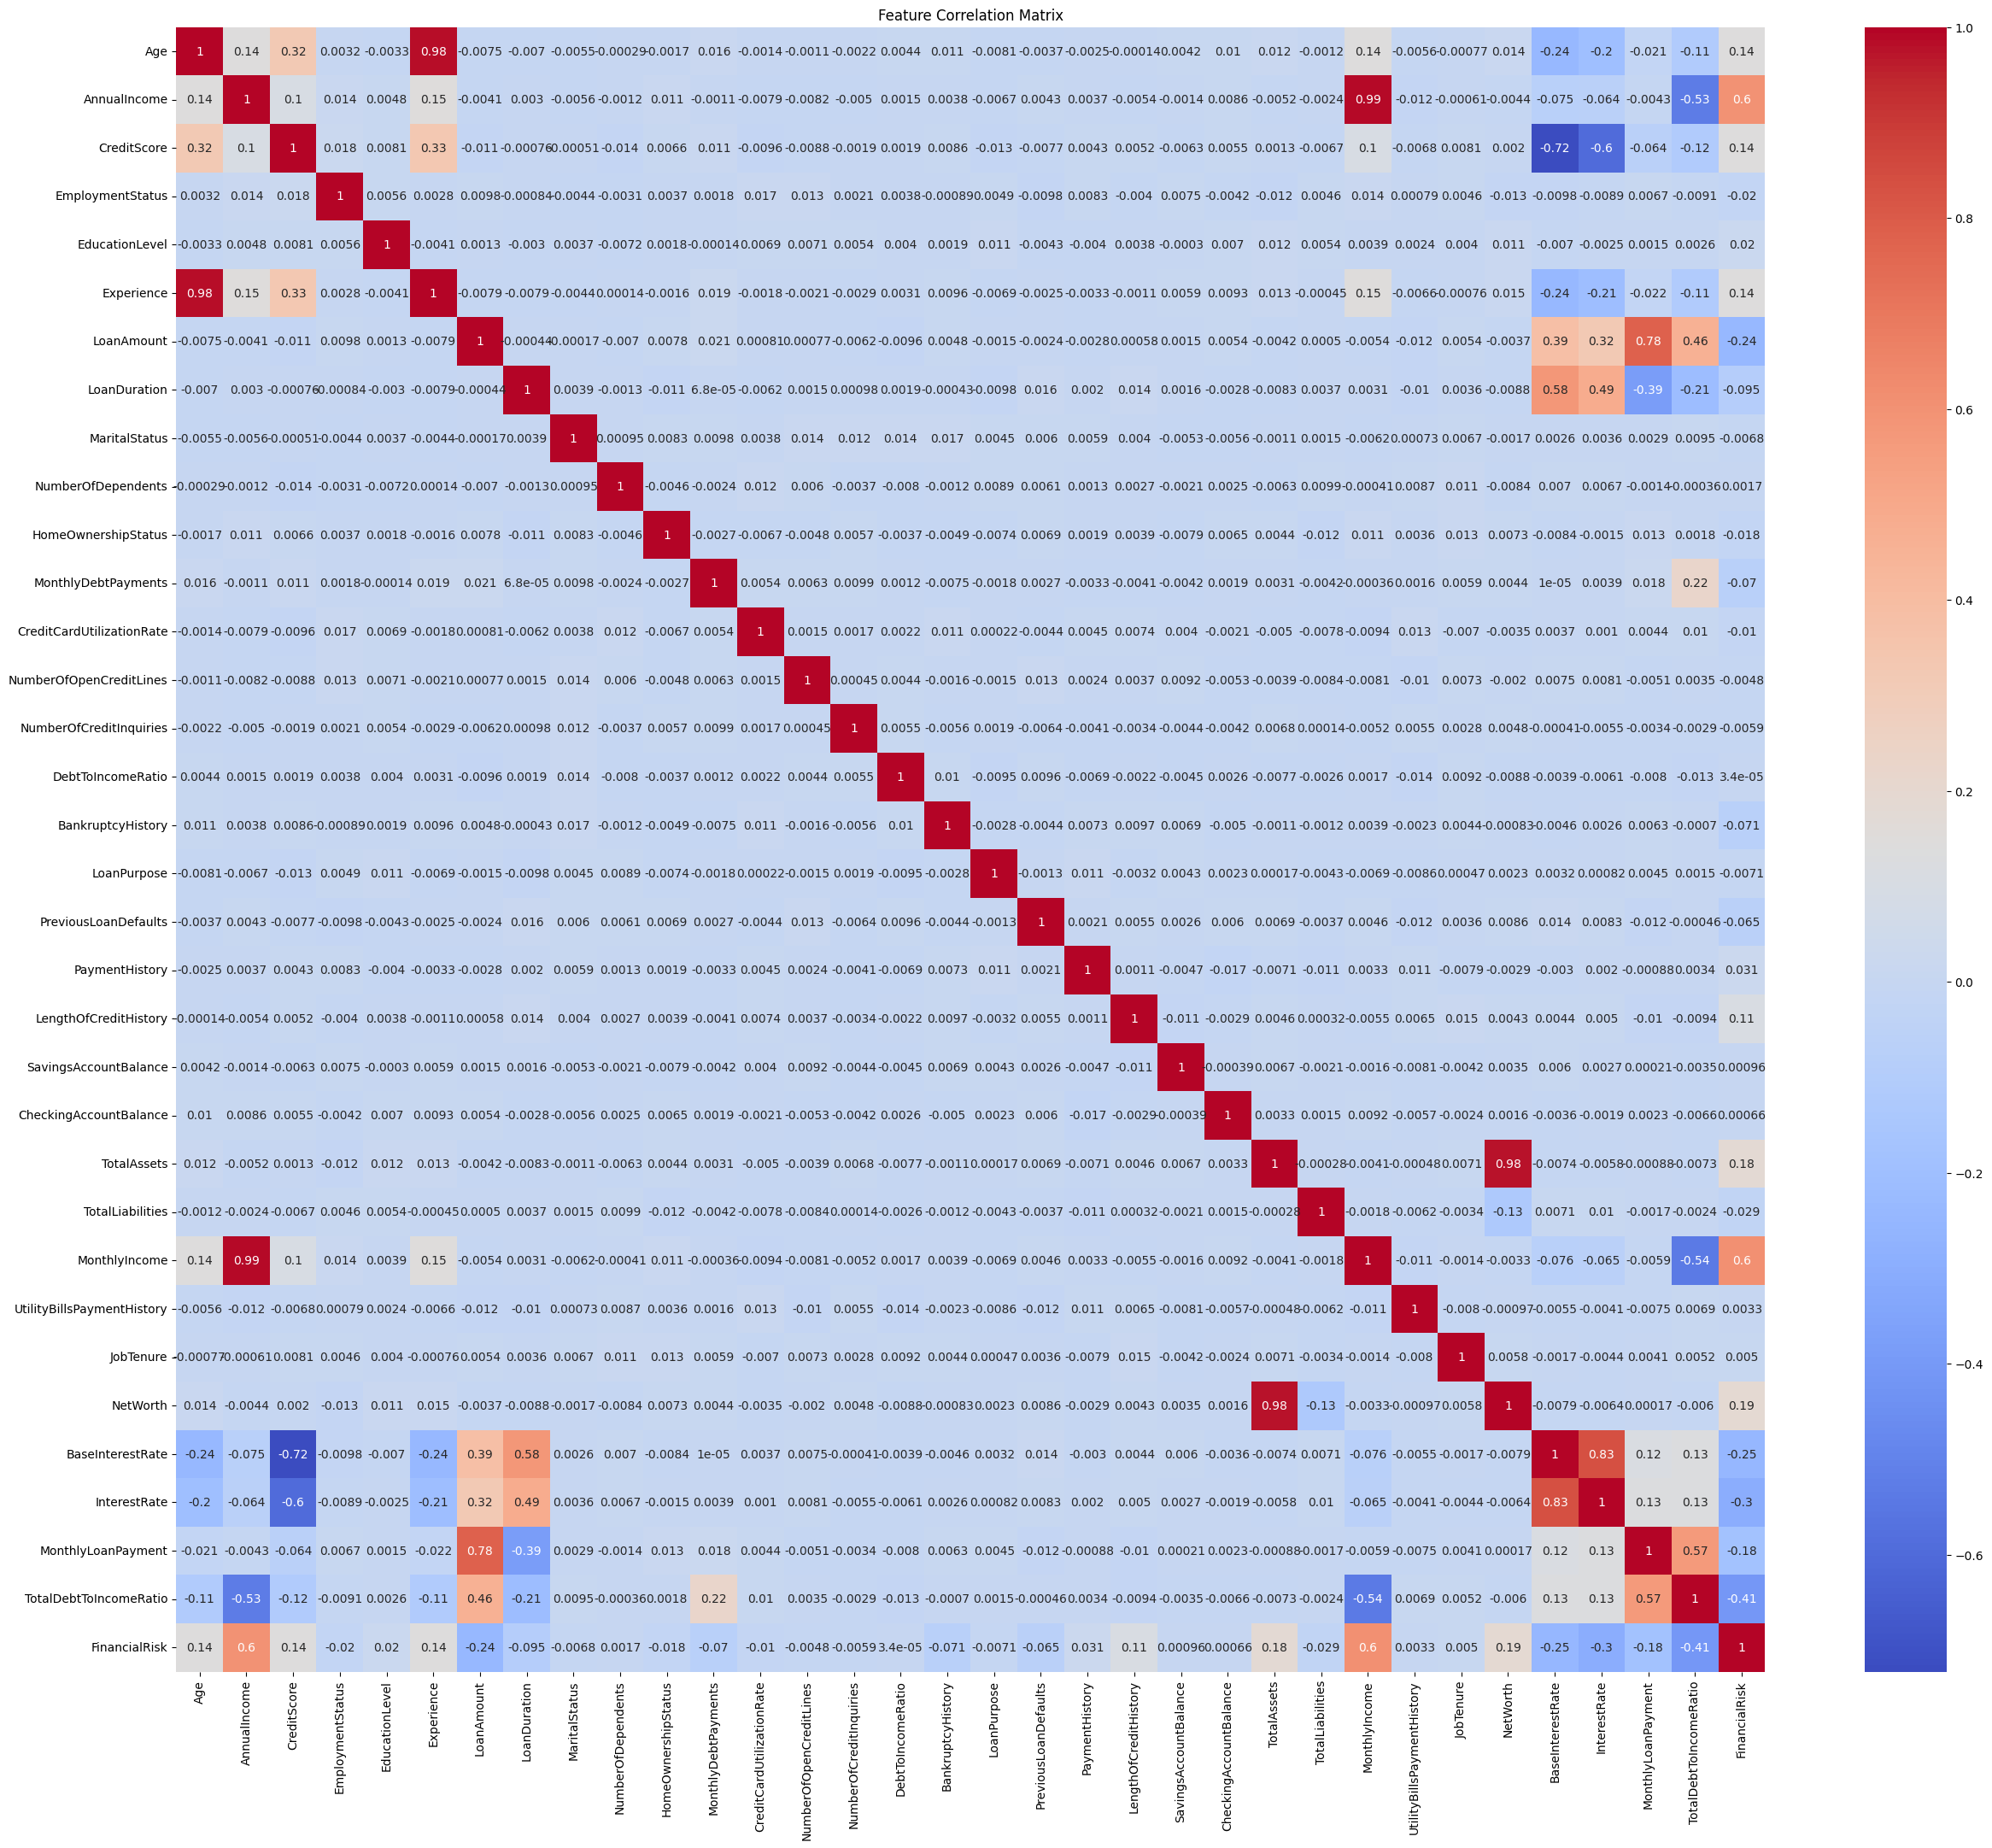

In [ ]:
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

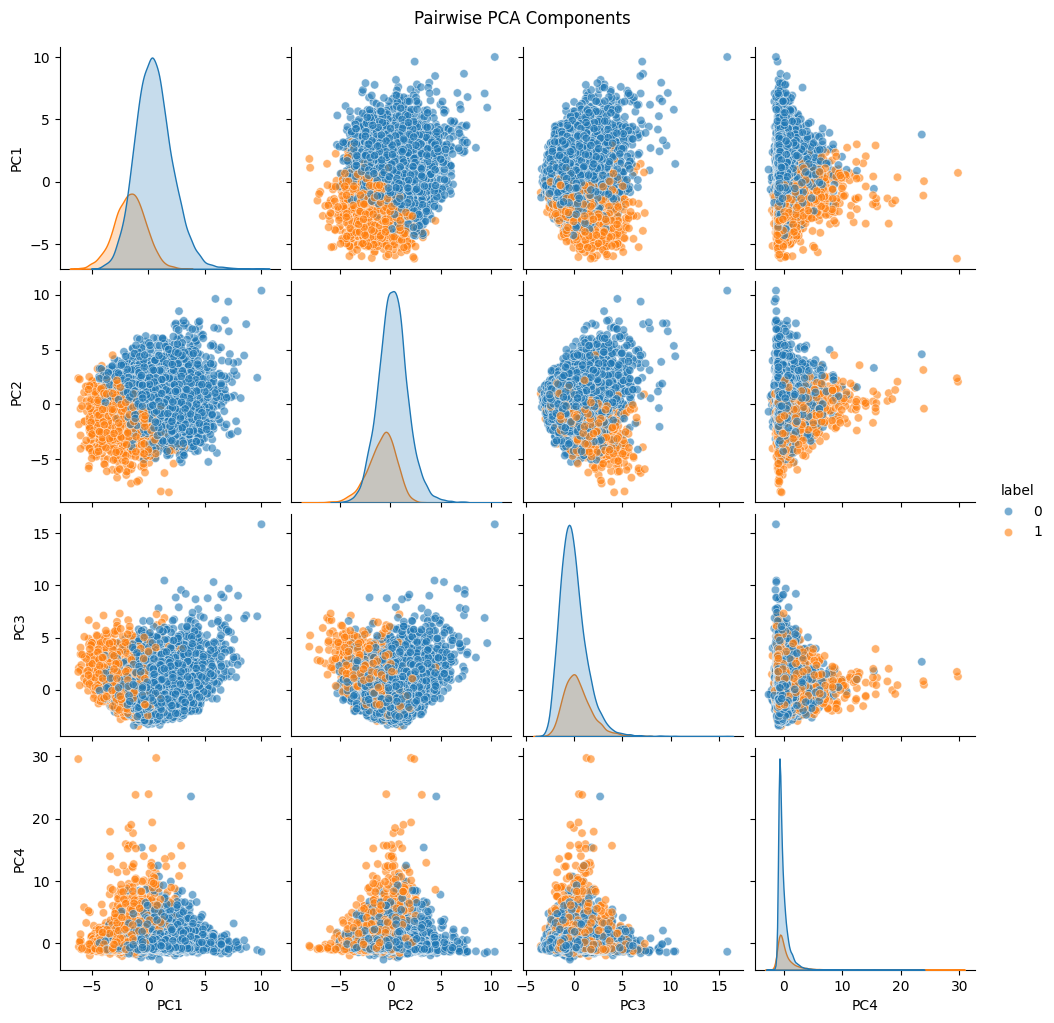

In [ ]:
n_components = 4  # Number of components you want to plot
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components and the target labels
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['label'] = y  # Add the target variable for color-coding

# Pairplot of PCA components with hue based on target labels
sns.pairplot(pca_df, hue='label', plot_kws={'alpha':0.6})
plt.suptitle("Pairwise PCA Components", y=1.02)  # Adjust y to position the title properly
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Checking if the target data is balanced
print(df['FinancialRisk'].value_counts())

FinancialRisk
0    15220
1     4780
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
# Check class distribution after SMOTE
print(y_res.value_counts())

FinancialRisk
0    12237
1    12237
Name: count, dtype: int64


**Initializing Models**

In [ ]:
lr_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
xgboost_model = XGBClassifier(random_state=42)
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, random_seed=42, verbose=100)
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

**Logistic Regression**

In [ ]:
lr_param = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [ ]:
lr_model = GridSearchCV(LogisticRegression(random_state=42), lr_param, cv=5, scoring='accuracy')
lr_model.fit(X_res, y_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print("Logistic Regression Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 94.88%
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2983
           1       0.87      0.93      0.90      1017

    accuracy                           0.95      4000
   macro avg       0.93      0.94      0.93      4000
weighted avg       0.95      0.95      0.95      4000



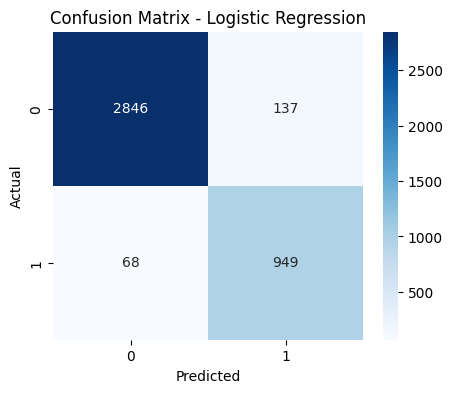

In [ ]:
cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Random Forest**

In [ ]:
random_forest_model.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [ ]:
random_forest_pred = random_forest_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, random_forest_pred)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("Random Forest Report:")
print(classification_report(y_test, random_forest_pred))

Random Forest Accuracy: 92.88%
Random Forest Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2983
           1       0.84      0.88      0.86      1017

    accuracy                           0.93      4000
   macro avg       0.90      0.91      0.91      4000
weighted avg       0.93      0.93      0.93      4000



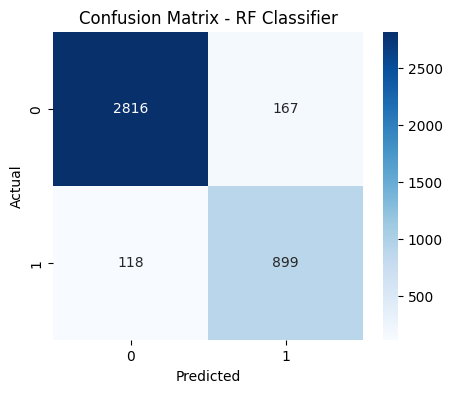

In [ ]:
cm = confusion_matrix(y_test, random_forest_pred)
plt.figure(figsize=(5, 4))  # Adjust the figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)  # Enable the color bar (cbar=True)
plt.title("Confusion Matrix - RF Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**XGBoost Classifier**

In [ ]:
xgb_param = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [1, 1.5, 2, 3],
}

In [ ]:
xgb_model = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=xgb_param,
    n_iter=50,  # Number of different combinations to try
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [ ]:
xgb_model.fit(X_res, y_res)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [1, 1.5, 2, 3],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
print("XGBoost Report:")
print(classification_report(y_test, xgb_pred))

XGBoost Accuracy: 95.38%
XGBoost Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2983
           1       0.90      0.92      0.91      1017

    accuracy                           0.95      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.95      0.95      0.95      4000



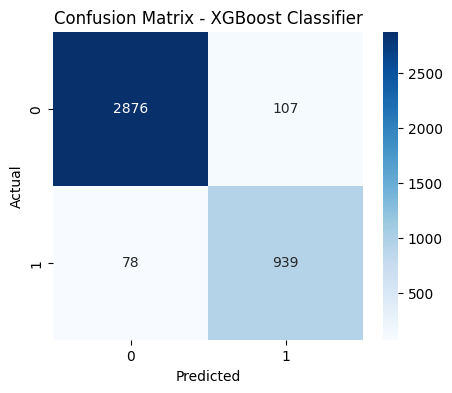

In [ ]:
cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Feature Importance Using XGBoost Classifier**

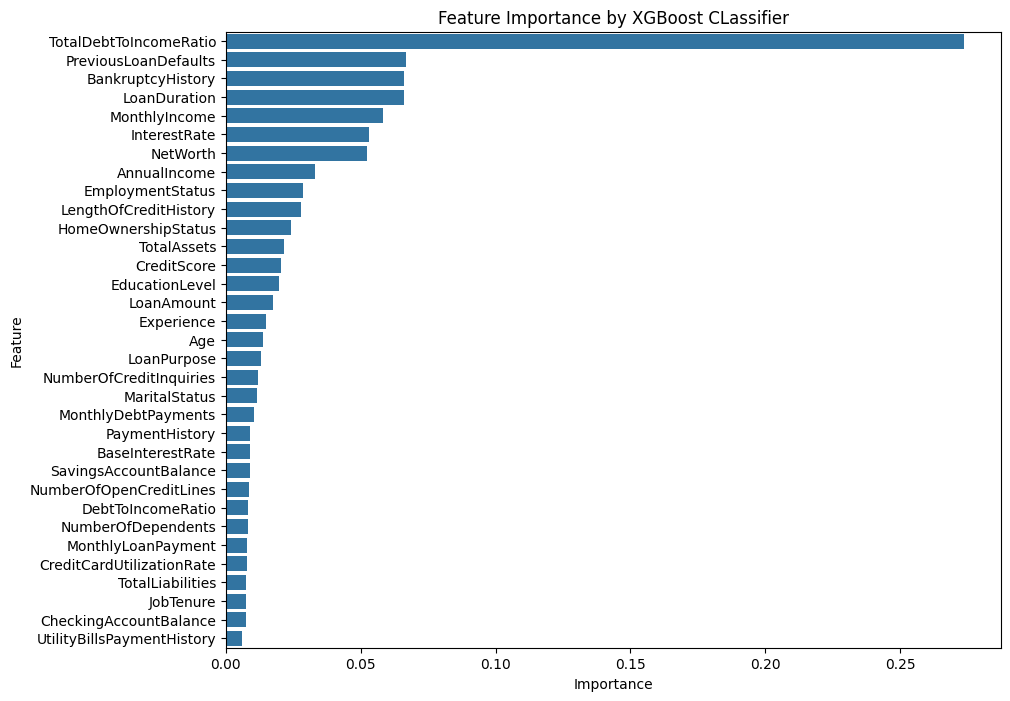

In [ ]:
# Plot Feature Importance
importances = xgb_model.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance by XGBoost CLassifier")
plt.show()

**CatBoost Classifier**

In [ ]:
catboost_model.fit(X_res, y_res)

0:	learn: 0.6374771	total: 60.6ms	remaining: 30.2s
100:	learn: 0.1329957	total: 1.2s	remaining: 4.73s
200:	learn: 0.0972562	total: 2.31s	remaining: 3.43s
300:	learn: 0.0771062	total: 3.44s	remaining: 2.27s
400:	learn: 0.0628797	total: 4.56s	remaining: 1.13s
499:	learn: 0.0533414	total: 5.65s	remaining: 0us


In [ ]:
catboost_model_pred = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, catboost_model_pred)
print(f"CatBoost Accuracy: {catboost_accuracy * 100:.2f}%")
print("CatBoost Report:")
print(classification_report(y_test, catboost_model_pred))

CatBoost Accuracy: 95.85%
CatBoost Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2983
           1       0.90      0.94      0.92      1017

    accuracy                           0.96      4000
   macro avg       0.94      0.95      0.95      4000
weighted avg       0.96      0.96      0.96      4000



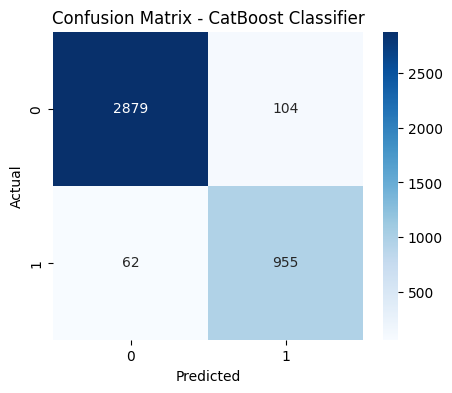

In [ ]:
cm = confusion_matrix(y_test, catboost_model_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix - CatBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**KNN Classifier**

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_model_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_model_pred)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print("KNN Report:")
print(classification_report(y_test, knn_model_pred))

KNN Accuracy: 85.50%
KNN Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2983
           1       0.75      0.65      0.70      1017

    accuracy                           0.85      4000
   macro avg       0.82      0.79      0.80      4000
weighted avg       0.85      0.85      0.85      4000



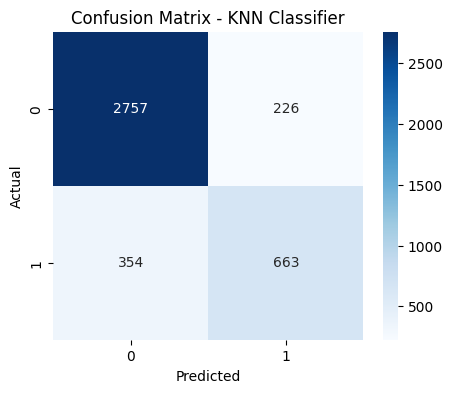

In [ ]:
cm = confusion_matrix(y_test, knn_model_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix - KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Stacked Ensemble Model**

In [ ]:
base_models = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
]

In [ ]:
meta_model = LogisticRegression(random_state=42, max_iter=1000)

In [ ]:
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=20)
stacked_model.fit(X_res, y_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:40:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-

StackingClassifier(cv=20,
                   estimators=[('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42))

In [ ]:
y_stack_pred = stacked_model.predict(X_test)
stack_accuracy = accuracy_score(y_test, y_stack_pred)
print(f"Stacked Ensemble Accuracy: {stack_accuracy * 100:.2f}%")
print("Stacked Ensemble Report:")
print(classification_report(y_test, y_stack_pred))

Stacked Ensemble Accuracy: 94.92%
Stacked Ensemble Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2983
           1       0.90      0.90      0.90      1017

    accuracy                           0.95      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.95      0.95      0.95      4000



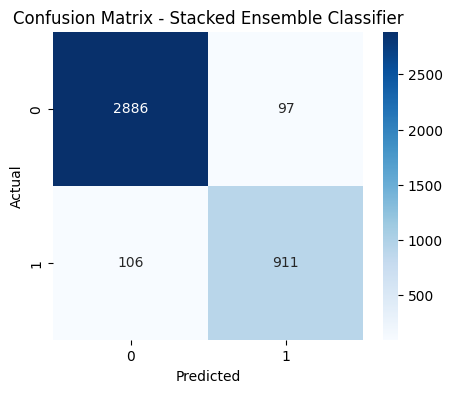

In [ ]:
cm = confusion_matrix(y_test, y_stack_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix - Stacked Ensemble Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Hybrid Model (CatBoost+SVM)**

In [ ]:
catboost_clf = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=0
)

In [ ]:
catboost_clf.fit(X_res, y_res)

In [ ]:
X_train_meta = catboost_clf.predict_proba(X_res)
X_test_meta = catboost_clf.predict_proba(X_test)

In [ ]:
svm_clf = SVC(probability=True, kernel='rbf', random_state=42)
svm_clf.fit(X_train_meta, y_res)

SVC(probability=True, random_state=42)

In [ ]:
y_pred_hybrid = svm_clf.predict(X_test_meta)
hybrid_model_accuracy = accuracy_score(y_test, y_pred_hybrid)
print(f"Hybrid Model Accuracy: {hybrid_model_accuracy * 100:.2f}%")
print("Hybrid Model Classification Report:")
print(classification_report(y_test, y_pred_hybrid))

Hybrid Model Accuracy: 95.93%
Hybrid Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2983
           1       0.92      0.92      0.92      1017

    accuracy                           0.96      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.96      0.96      0.96      4000



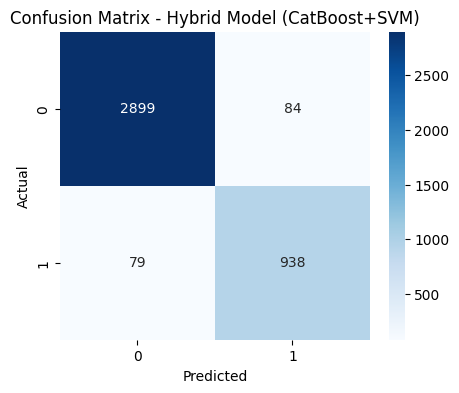

In [ ]:
# Confusion Matrix
cm_hybrid = confusion_matrix(y_test, y_pred_hybrid)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_hybrid, annot=True, fmt="d", cmap="Blues", xticklabels=catboost_clf.classes_, yticklabels=catboost_clf.classes_)
plt.title("Confusion Matrix - Hybrid Model (CatBoost+SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

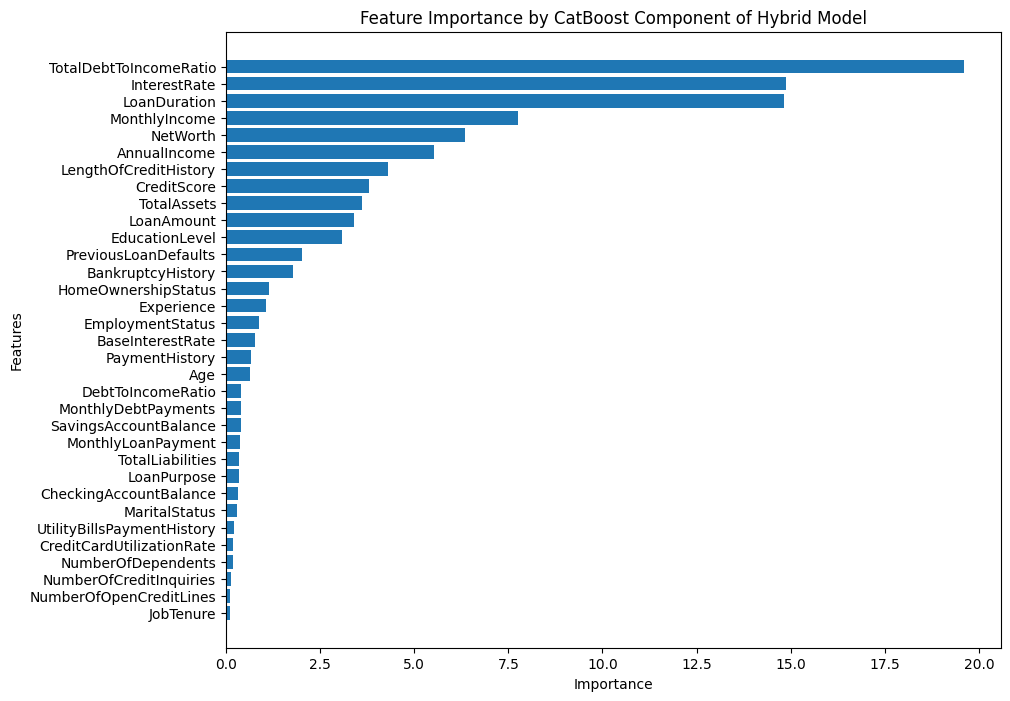

In [ ]:
feature_importance = catboost_clf.get_feature_importance()
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance by CatBoost Component of Hybrid Model")
plt.gca().invert_yaxis()  # Invert y-axis for a descending order plot
plt.show()

**TabNet Classifier**

In [ ]:
X_res_np, y_res_np = X_res.to_numpy(), y_res.to_numpy()
X_test_np, y_test_np = X_test.to_numpy(), y_test.to_numpy()

In [ ]:
tabnet_model = TabNetClassifier()

tabnet_model.fit(
    X_res_np, y_res_np,
    max_epochs=50,
    patience=5,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.56253 |  0:00:02s
epoch 1  | loss: 0.36089 |  0:00:03s
epoch 2  | loss: 0.29122 |  0:00:04s
epoch 3  | loss: 0.24046 |  0:00:05s
epoch 4  | loss: 0.20537 |  0:00:06s
epoch 5  | loss: 0.1731  |  0:00:07s
epoch 6  | loss: 0.15836 |  0:00:08s
epoch 7  | loss: 0.14373 |  0:00:10s
epoch 8  | loss: 0.13031 |  0:00:11s
epoch 9  | loss: 0.12354 |  0:00:12s
epoch 10 | loss: 0.12043 |  0:00:13s
epoch 11 | loss: 0.11923 |  0:00:14s
epoch 12 | loss: 0.11531 |  0:00:15s
epoch 13 | loss: 0.11443 |  0:00:16s
epoch 14 | loss: 0.11572 |  0:00:17s
epoch 15 | loss: 0.11789 |  0:00:18s
epoch 16 | loss: 0.11524 |  0:00:19s
epoch 17 | loss: 0.10797 |  0:00:20s
epoch 18 | loss: 0.11091 |  0:00:21s
epoch 19 | loss: 0.10719 |  0:00:22s
epoch 20 | loss: 0.10583 |  0:00:24s
epoch 21 | loss: 0.11065 |  0:00:25s
epoch 22 | loss: 0.10751 |  0:00:26s
epoch 23 | loss: 0.10564 |  0:00:27s
epoch 24 | loss: 0.10888 |  0:00:28s
epoch 25 | loss: 0.10455 |  0:00:29s
epoch 26 | loss: 0.10713 |  0:00:30s
e

In [ ]:
tabnet_pred = tabnet_model.predict(X_test_np)
tabnet_accuracy = accuracy_score(y_test_np, tabnet_pred)
print(f"TabNet Accuracy: {tabnet_accuracy * 100:.2f}%")
print("TabNet Classification Report:")
print(classification_report(y_test_np, tabnet_pred))

TabNet Accuracy: 94.67%
TabNet Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2983
           1       0.87      0.93      0.90      1017

    accuracy                           0.95      4000
   macro avg       0.92      0.94      0.93      4000
weighted avg       0.95      0.95      0.95      4000



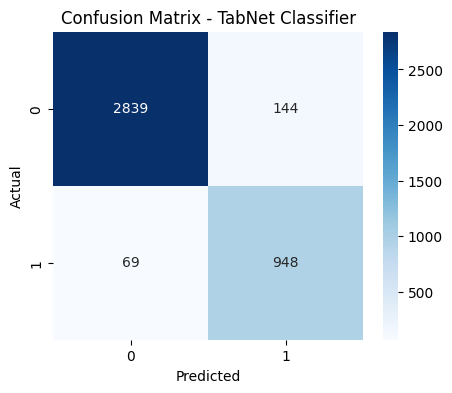

In [ ]:
cm = confusion_matrix(y_test, tabnet_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix - TabNet Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

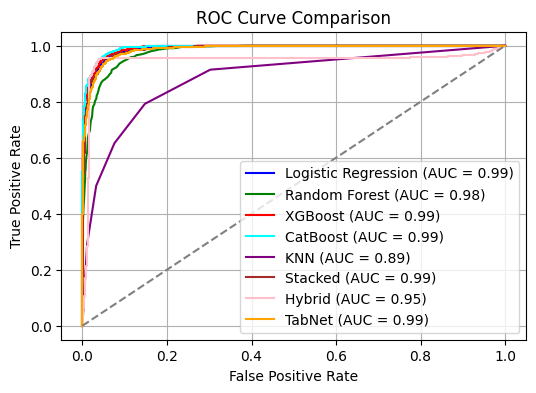

In [ ]:
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = random_forest_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
catboost_probs = catboost_model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]
stack_probs = stacked_model.predict_proba(X_test)[:, 1]
hybrid_probs = svm_clf.predict_proba(X_test_meta)[:, 1]
tabnet_probs = tabnet_model.predict_proba(X_test.to_numpy())[:, 1]

# Calculate ROC curves and AUC scores
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
catboost_fpr, catboost_tpr, _ = roc_curve(y_test, catboost_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
stack_fpr, stack_tpr, _ = roc_curve(y_test, stack_probs)
hybrid_fpr, hybrid_tpr, _ = roc_curve(y_test, hybrid_probs)
tabnet_fpr, tabnet_tpr, _ = roc_curve(y_test, tabnet_probs)

lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
catboost_auc = roc_auc_score(y_test, catboost_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
stack_auc = roc_auc_score(y_test, stack_probs)
hybrid_auc = roc_auc_score(y_test, hybrid_probs)
tabnet_auc = roc_auc_score(y_test, tabnet_probs)

# Plot ROC curves
plt.figure(figsize=(6, 4))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})', color='blue')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='red')
plt.plot(catboost_fpr, catboost_tpr, label=f'CatBoost (AUC = {catboost_auc:.2f})', color='cyan')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})', color='purple')
plt.plot(stack_fpr, stack_tpr, label=f'Stacked (AUC = {stack_auc:.2f})', color='brown')
plt.plot(hybrid_fpr, hybrid_tpr, label=f'Hybrid (AUC = {hybrid_auc:.2f})', color='pink')
plt.plot(tabnet_fpr, tabnet_tpr, label=f'TabNet (AUC = {tabnet_auc:.2f})', color='orange')

# Plot the no-skill line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()